In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import json

In [3]:
trade_order_level_filled = pd.read_csv("gotrade - trade order level filled.csv")
trade_order_level_filled_sorted = trade_order_level_filled.sort_values(by='identifier', ascending=True)
trade_order_level_filled_sorted.reset_index(drop=True, inplace=True)
trade_order_level_filled_sorted

,identifier,trade_order_level_filled_at,order_type,side,symbol,qty,trade_value_usd,avg_price_usd
0,1,2021-12-22 16:39:06,dollar,buy,AAPL,0.057509,10.000000,173.8850
1,1,2021-12-29 14:50:05,dollar,sell,AAPL,0.027731,5.000000,180.3050
2,1,2021-12-29 14:49:33,dollar,buy,AAPL,0.054843,9.880000,180.1500
3,2,2022-01-28 17:59:41,shares,buy,GRAB,1.000000,5.399900,5.3999
4,2,2023-04-19 13:34:20,dollar,buy,GRAB,0.339213,1.000000,2.9480
...,...,...,...,...,...,...,...,...
252491,2700,2023-08-22 13:54:31,dollar,buy,NOW,0.008904,4.999999,561.5520
252492,2700,2023-08-23 14:46:00,shares,sell,LOW,0.044218,10.004598,226.2580
252493,2700,2023-08-24 13:39:56,dollar,buy,HAL,0.388750,14.900000,38.3280
252494,2700,2023-08-22 14:05:05,dollar,buy,TSLA,0.004241,1.000000,235.7820


In [4]:
with open('symbol_sector.json', 'r') as file:
    symbol_sector = json.load(file)

symbol_sector['AAPL']


'Technology'

In [5]:
trade_order_buy = trade_order_level_filled_sorted[trade_order_level_filled_sorted['side'] == 'buy']
trade_order_buy = trade_order_buy[['identifier', 'side', 'symbol', 'trade_value_usd']]
trade_order_buy.reset_index(drop=True, inplace=True)
trade_order_buy

,identifier,side,symbol,trade_value_usd
0,1,buy,AAPL,10.000000
1,1,buy,AAPL,9.880000
2,2,buy,GRAB,5.399900
3,2,buy,GRAB,1.000000
4,2,buy,AAPL,1.000000
...,...,...,...,...
150691,2700,buy,AAPL,10.000000
150692,2700,buy,NOW,4.999999
150693,2700,buy,HAL,14.900000
150694,2700,buy,TSLA,1.000000


In [6]:
missing_list = []
for symbol in trade_order_buy['symbol']:
    if symbol_sector.get(symbol) is None:
        if symbol not in missing_list:
            missing_list.append(symbol)

print(missing_list)

['BRK.B', 'TWTR', 'TTCF', 'BF.B']


In [7]:
# BRK.B : Financial Services
symbol_sector['BRK.B'] = 'Financial Services'

# TWTR: Communication Services
symbol_sector['TWTR'] = 'Communication Services'

# TTCF: Consumer Defensive      (Consumer Staples)
symbol_sector['TTCF'] = 'Consumer Defensive'

# BF.B: Consumer Defensive
symbol_sector['BF.B'] = 'Consumer Defensive'

# EXPD: Industrials
symbol_sector['EXPD'] = 'Industrials'

In [8]:
sector_list = []
for symbol in trade_order_buy['symbol']:
    sector_list.append(symbol_sector[symbol])
        
trade_order_buy['sector'] = sector_list

trade_order_buy

,identifier,side,symbol,trade_value_usd,sector
0,1,buy,AAPL,10.000000,Technology
1,1,buy,AAPL,9.880000,Technology
2,2,buy,GRAB,5.399900,Technology
3,2,buy,GRAB,1.000000,Technology
4,2,buy,AAPL,1.000000,Technology
...,...,...,...,...,...
150691,2700,buy,AAPL,10.000000,Technology
150692,2700,buy,NOW,4.999999,Technology
150693,2700,buy,HAL,14.900000,Energy
150694,2700,buy,TSLA,1.000000,Consumer Cyclical


In [9]:
print(trade_order_buy['sector'].unique())
len(trade_order_buy['sector'].unique())

['Technology' 'Healthcare' 'Communication Services' 'Consumer Cyclical'
 'Financial Services' 'Consumer Defensive' 'Industrials' 'Energy'
 'Utilities' 'Basic Materials' 'Real Estate']


11

In [10]:
trade_order_buy_summary= trade_order_buy.groupby(['identifier', 'sector']).agg(
    purchase_times=('sector', 'count'),
    total_amount=('trade_value_usd', 'sum')
).reset_index()

trade_order_buy_summary

,identifier,sector,purchase_times,total_amount
0,1,Technology,2,19.880000
1,2,Communication Services,1,0.999998
2,2,Consumer Cyclical,1,1.880000
3,2,Financial Services,1,1.000000
4,2,Healthcare,3,9.044000
...,...,...,...,...
9983,2698,Technology,2,187.598400
9984,2699,Technology,1,14.940000
9985,2700,Consumer Cyclical,5,31.899999
9986,2700,Energy,2,24.800000


### Overall summary

In [11]:
# Overall summary
Overall_summary = trade_order_buy_summary.groupby(['sector']).agg(
    total_purchase_times = ('purchase_times', 'sum'),
    total_amount = ('total_amount', 'sum')
).reset_index()

Overall_summary['amount_per_buy'] = Overall_summary['total_amount'] / Overall_summary['total_purchase_times']

Overall_summary

,sector,total_purchase_times,total_amount,amount_per_buy
0,Basic Materials,405,1.847934e+05,456.280054
1,Communication Services,27009,1.341913e+07,496.839307
2,Consumer Cyclical,47432,2.440864e+07,514.602742
3,Consumer Defensive,2482,1.049287e+06,422.758654
4,Energy,2148,1.097605e+06,510.989177
5,Financial Services,16523,1.274989e+07,771.645095
6,Healthcare,15821,9.487528e+06,599.679412
7,Industrials,4829,2.380110e+06,492.878462
8,Real Estate,715,2.248387e+05,314.459717
9,Technology,33313,1.465579e+07,439.942015


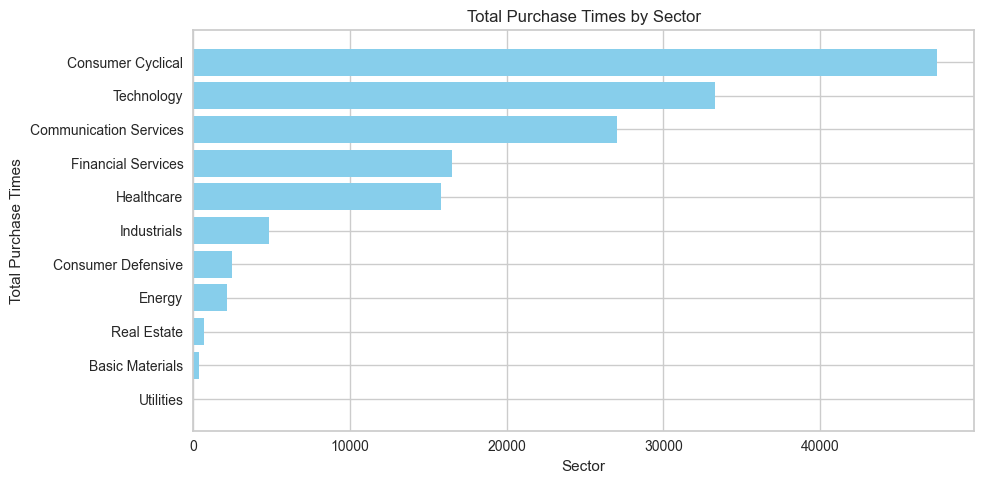

In [31]:
Overall_summary = Overall_summary.sort_values('total_purchase_times', ascending=True)

plt.figure(figsize=(10,5))
plt.barh(Overall_summary['sector'], Overall_summary['total_purchase_times'], color='skyblue')
plt.xlabel('Sector')
plt.ylabel('Total Purchase Times')
plt.title('Total Purchase Times by Sector')
plt.tight_layout()  
plt.show()

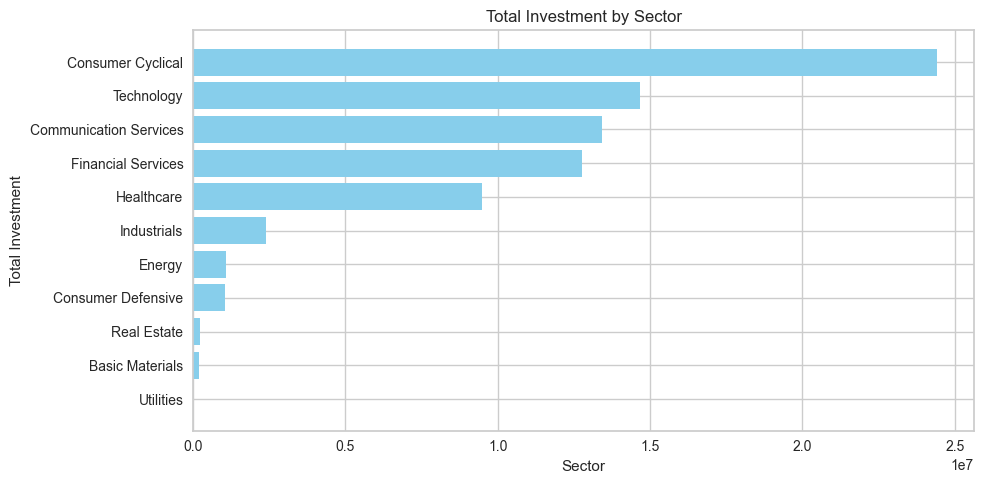

In [32]:
Overall_summary = Overall_summary.sort_values('total_amount', ascending=True)

plt.figure(figsize=(10,5))
plt.barh(Overall_summary['sector'], Overall_summary['total_amount'], color='skyblue')
plt.xlabel('Sector')
plt.ylabel('Total Investment')
plt.title('Total Investment by Sector')
plt.tight_layout()  
plt.show()

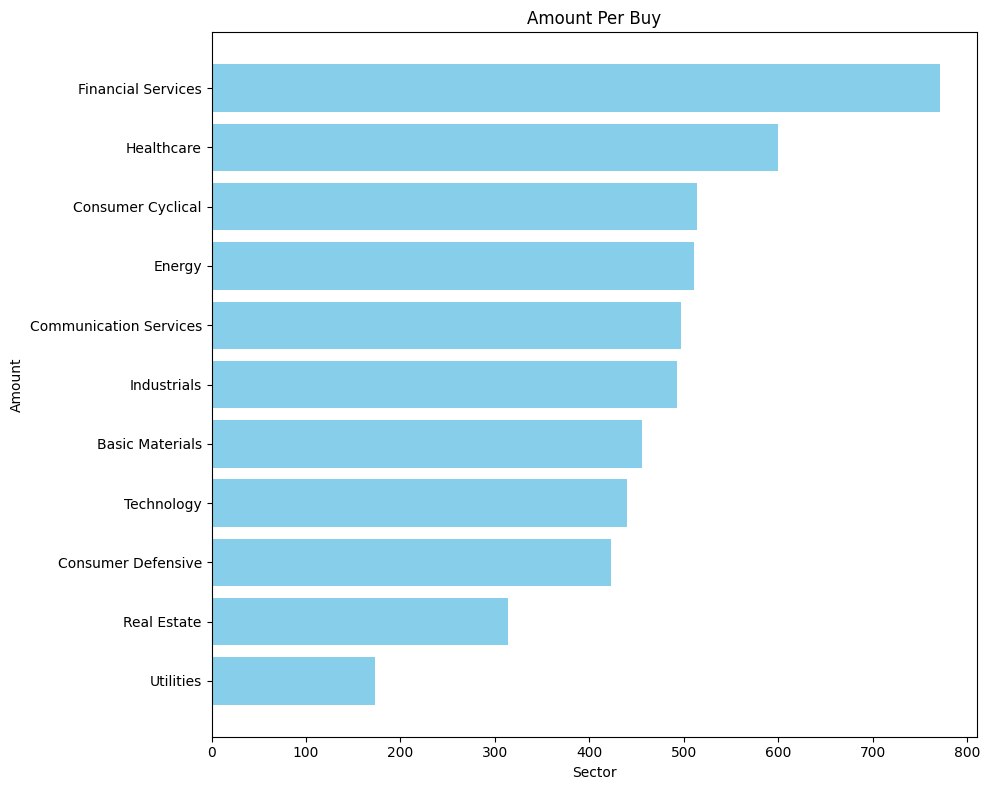

In [14]:
Overall_summary = Overall_summary.sort_values('amount_per_buy', ascending=True)

plt.figure(figsize=(10,8))
plt.barh(Overall_summary['sector'], Overall_summary['amount_per_buy'], color='skyblue')
plt.xlabel('Sector')
plt.ylabel('Amount')
plt.title('Amount Per Buy')
plt.tight_layout()  
plt.show()

### User Summary

In [15]:
trade_order_buy_summary

,identifier,sector,purchase_times,total_amount
0,1,Technology,2,19.880000
1,2,Communication Services,1,0.999998
2,2,Consumer Cyclical,1,1.880000
3,2,Financial Services,1,1.000000
4,2,Healthcare,3,9.044000
...,...,...,...,...
9983,2698,Technology,2,187.598400
9984,2699,Technology,1,14.940000
9985,2700,Consumer Cyclical,5,31.899999
9986,2700,Energy,2,24.800000


In [16]:
column_names = ['identifier',
                'Technology',
                'Healthcare', 
                'Communication Services', 
                'Consumer Cyclical',
                'Financial Services',
                'Consumer Defensive',
                'Industrials',
                'Energy',
                'Utilities',
                'Basic Materials',
                'Real Estate']

#user_trade_time_summary = pd.DataFrame(columns=column_names)
#user_trade_amount_summary = pd.DataFrame(columns=column_names)
#user_trade_amount_summary

In [17]:
# user_trade_time_summary
user_trade_time_summary = trade_order_buy_summary.pivot_table(
                            index='identifier', 
                            columns='sector', 
                            values='purchase_times', 
                            aggfunc='sum', 
                            fill_value=0)

user_trade_time_summary.reset_index(inplace=True)
user_trade_time_summary = user_trade_time_summary.reindex(columns=column_names, fill_value=0)
user_trade_time_summary

# 有些用户没有进行交易，所以不会被列在这个表当中

sector,identifier,Technology,Healthcare,Communication Services,Consumer Cyclical,Financial Services,Consumer Defensive,Industrials,Energy,Utilities,Basic Materials,Real Estate
0,1,2,0,0,0,0,0,0,0,0,0,0
1,2,7,3,1,1,1,0,0,0,0,0,0
2,3,1,0,2,0,3,0,0,0,0,0,0
3,4,5,0,0,0,0,0,0,0,0,0,0
4,5,1,1,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2570,2696,5,0,1,15,11,6,3,0,0,0,0
2571,2697,0,0,0,0,1,0,0,0,0,0,0
2572,2698,2,0,0,3,0,0,0,0,0,0,0
2573,2699,1,0,0,0,0,0,0,0,0,0,0


In [35]:
user_trade_time_summary['Max_Sector'] = user_trade_time_summary.iloc[:, 1:12].idxmax(axis=1)

user_trade_time_summary

sector,identifier,Technology,Healthcare,Communication Services,Consumer Cyclical,Financial Services,Consumer Defensive,Industrials,Energy,Utilities,Basic Materials,Real Estate,Max_Sector
0,1,2,0,0,0,0,0,0,0,0,0,0,Technology
1,2,7,3,1,1,1,0,0,0,0,0,0,Technology
2,3,1,0,2,0,3,0,0,0,0,0,0,Financial Services
3,4,5,0,0,0,0,0,0,0,0,0,0,Technology
4,5,1,1,0,0,3,0,0,0,0,0,0,Financial Services
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2570,2696,5,0,1,15,11,6,3,0,0,0,0,Consumer Cyclical
2571,2697,0,0,0,0,1,0,0,0,0,0,0,Financial Services
2572,2698,2,0,0,3,0,0,0,0,0,0,0,Consumer Cyclical
2573,2699,1,0,0,0,0,0,0,0,0,0,0,Technology


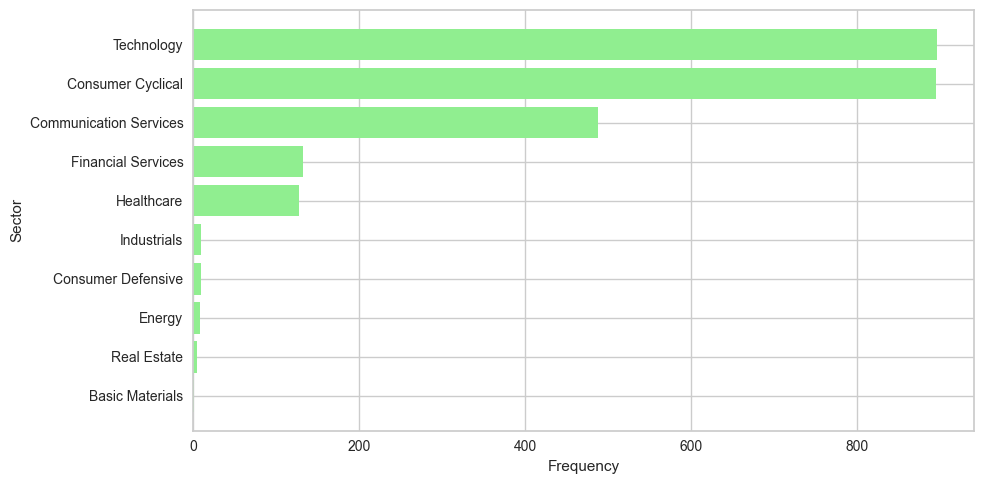

In [44]:
value_counts = user_trade_time_summary['Max_Sector'].value_counts()
value_counts = value_counts.sort_values(ascending=True)
# Plot the distribution
plt.figure(figsize=(10,5))
plt.barh(value_counts.index, value_counts.values, color='lightgreen')
plt.xlabel('Frequency')
plt.ylabel('Sector')
# plt.title('Distribution of Sector')
plt.tight_layout()  
plt.show()

In [26]:
user_trade_amount_summary = trade_order_buy_summary.pivot_table(
                            index='identifier', 
                            columns='sector', 
                            values='total_amount', 
                            aggfunc='sum', 
                            fill_value=0)

user_trade_amount_summary.reset_index(inplace=True)
user_trade_amount_summary = user_trade_amount_summary.reindex(columns=column_names, fill_value=0)
user_trade_amount_summary

sector,identifier,Technology,Healthcare,Communication Services,Consumer Cyclical,Financial Services,Consumer Defensive,Industrials,Energy,Utilities,Basic Materials,Real Estate
0,1,19.880000,0.000,0.000000,0.000000,0.000000,0.000,0.00,0.0,0.0,0.0,0.0
1,2,12.679900,9.044,0.999998,1.880000,1.000000,0.000,0.00,0.0,0.0,0.0,0.0
2,3,1.880000,0.000,11.779999,0.000000,24.840000,0.000,0.00,0.0,0.0,0.0,0.0
3,4,32.279999,0.000,0.000000,0.000000,0.000000,0.000,0.00,0.0,0.0,0.0,0.0
4,5,9.880000,45.030,0.000000,0.000000,21.330000,0.000,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2570,2696,420.667100,0.000,142.099000,4559.444997,674.529999,334.205,25.52,0.0,0.0,0.0,0.0
2571,2697,0.000000,0.000,0.000000,0.000000,15.620000,0.000,0.00,0.0,0.0,0.0,0.0
2572,2698,187.598400,0.000,0.000000,361.443000,0.000000,0.000,0.00,0.0,0.0,0.0,0.0
2573,2699,14.940000,0.000,0.000000,0.000000,0.000000,0.000,0.00,0.0,0.0,0.0,0.0


In [46]:
user_trade_amount_summary['Max_Sector'] = user_trade_amount_summary.iloc[:, 1:12].idxmax(axis=1)

user_trade_amount_summary

sector,identifier,Technology,Healthcare,Communication Services,Consumer Cyclical,Financial Services,Consumer Defensive,Industrials,Energy,Utilities,Basic Materials,Real Estate,Max_Sector
0,1,19.880000,0.000,0.000000,0.000000,0.000000,0.000,0.00,0.0,0.0,0.0,0.0,Technology
1,2,12.679900,9.044,0.999998,1.880000,1.000000,0.000,0.00,0.0,0.0,0.0,0.0,Technology
2,3,1.880000,0.000,11.779999,0.000000,24.840000,0.000,0.00,0.0,0.0,0.0,0.0,Financial Services
3,4,32.279999,0.000,0.000000,0.000000,0.000000,0.000,0.00,0.0,0.0,0.0,0.0,Technology
4,5,9.880000,45.030,0.000000,0.000000,21.330000,0.000,0.00,0.0,0.0,0.0,0.0,Healthcare
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2570,2696,420.667100,0.000,142.099000,4559.444997,674.529999,334.205,25.52,0.0,0.0,0.0,0.0,Consumer Cyclical
2571,2697,0.000000,0.000,0.000000,0.000000,15.620000,0.000,0.00,0.0,0.0,0.0,0.0,Financial Services
2572,2698,187.598400,0.000,0.000000,361.443000,0.000000,0.000,0.00,0.0,0.0,0.0,0.0,Consumer Cyclical
2573,2699,14.940000,0.000,0.000000,0.000000,0.000000,0.000,0.00,0.0,0.0,0.0,0.0,Technology


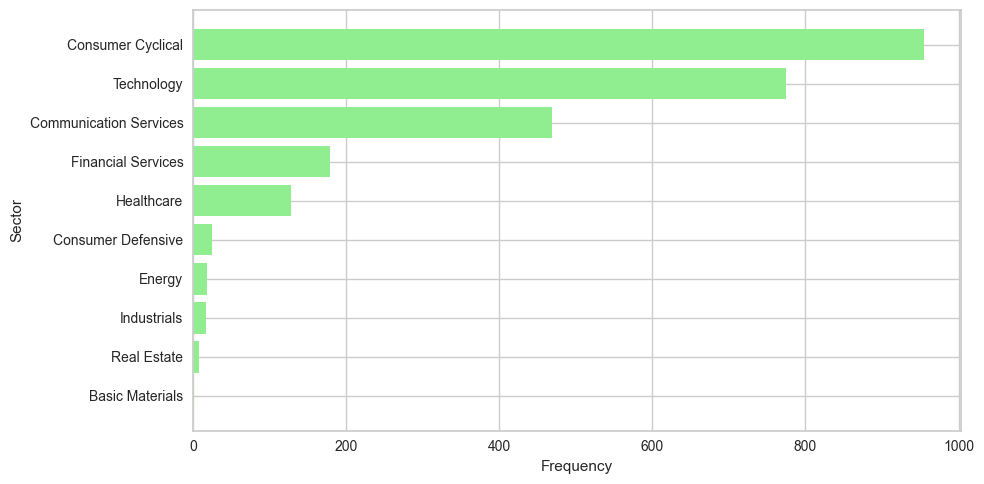

In [47]:
value_counts = user_trade_amount_summary['Max_Sector'].value_counts()
value_counts = value_counts.sort_values(ascending=True)
# Plot the distribution
plt.figure(figsize=(10,5))
plt.barh(value_counts.index, value_counts.values, color='lightgreen')
plt.xlabel('Frequency')
plt.ylabel('Sector')
# plt.title('Distribution of Sector')
plt.tight_layout()  
plt.show()